# Draw a track map with numbered corners

Use the position data of a single lap to draw a track map.
Then annotate the map with corner numbers.


Import FastF1 and load the data. Use the telemetry from the fastest for the
track map. (You could also use any other lap instead.)



In [3]:
import matplotlib.pyplot as plt
import numpy as np

import fastf1
from pathlib import Path


# Enable the cache
cache_dir = Path(r"C:\Users\aguse\OneDrive\Escritorio\PRY_AG\F1-analitics\Cache")
fastf1.Cache.enable_cache(str(cache_dir))
session = fastf1.get_session(2023, 'Silverstone', 'Q')
session.load()

lap = session.laps.pick_fastest()
pos = lap.get_pos_data()

circuit_info = session.get_circuit_info()

core           INFO 	Loading data for British Grand Prix - Qualifying [v3.7.0]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 

Define a helper function for rotating points around the origin of the
coordinate system.

The matrix ``[[cos, sin], [-sin, cos]]`` is called a rotation matrix.

By matrix multiplication of the rotation matrix with a vector [x, y], a new
rotated vector [x_rot, y_rot] is obtained.
(See also: https://en.wikipedia.org/wiki/Rotation_matrix)



In [4]:
def rotate(xy, *, angle):
    rot_mat = np.array([[np.cos(angle), np.sin(angle)],
                        [-np.sin(angle), np.cos(angle)]])
    return np.matmul(xy, rot_mat)

Get the coordinates of the track map from the telemetry of the lap and
rotate the coordinates using the rotation from ``circuit_info`` so that
the track map is oriented correctly. After that, plot the rotated track map.



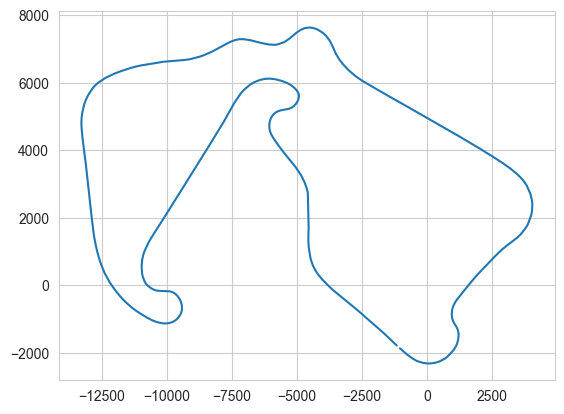

In [5]:
# Get an array of shape [n, 2] where n is the number of points and the second
# axis is x and y.
track = pos.loc[:, ('X', 'Y')].to_numpy()

# Convert the rotation angle from degrees to radian.
track_angle = circuit_info.rotation / 180 * np.pi

# Rotate and plot the track map.
rotated_track = rotate(track, angle=track_angle)
plt.plot(rotated_track[:, 0], rotated_track[:, 1])

Finally, the corner markers are plotted. To plot the numbers next to the
track, an offset vector that points straight up is defined. This offset
vector is then rotated by the angle that is given for each corner marker.
A line and circular bubble are drawn and the corner marker text is printed
inside the bubble.



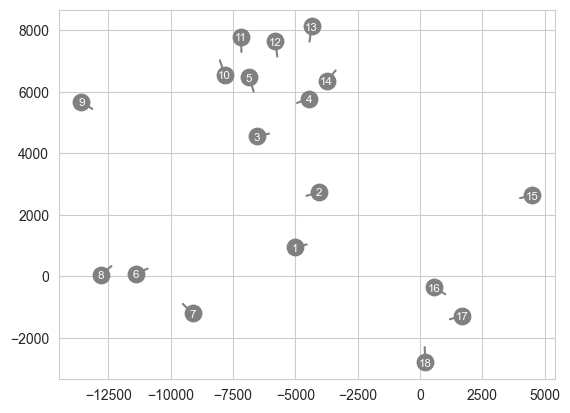

In [8]:
offset_vector = [500, 0]  # offset length is chosen arbitrarily to 'look good'
# Inicializar listas
txt_list = []
off_x_list = []
off_y_list = []
text_x_list = []
text_y_list = []
track_x_list = []
track_y_list = []

# Rellenar las listas dentro del bucle
for _, corner in circuit_info.corners.iterrows():
    txt = f"{corner['Number']}{corner['Letter']}"
    offset_angle = corner['Angle'] / 180 * np.pi

    off_x, off_y = rotate(offset_vector, angle=offset_angle)

    text_x = corner['X'] + off_x
    text_y = corner['Y'] + off_y

    text_x_rot, text_y_rot = rotate([text_x, text_y], angle=track_angle)
    track_x_rot, track_y_rot = rotate([corner['X'], corner['Y']], angle=track_angle)

    # Guardar en listas
    txt_list.append(txt)
    off_x_list.append(float(off_x))
    off_y_list.append(float(off_y))
    text_x_list.append(float(text_x_rot))
    text_y_list.append(float(text_y_rot))
    track_x_list.append(float(track_x_rot))
    track_y_list.append(float(track_y_rot))

# Convertir a arrays de NumPy para manipulación/plot más fácil
txt_arr = np.array(txt_list, dtype=object)
off_x_arr = np.array(off_x_list)
off_y_arr = np.array(off_y_list)
text_x_arr = np.array(text_x_list)
text_y_arr = np.array(text_y_list)
track_x_arr = np.array(track_x_list)
track_y_arr = np.array(track_y_list)

# Ejemplo de reutilización: volver a plotear los marcadores y líneas
plt.scatter(text_x_arr, text_y_arr, color='grey', s=140)
for i, t in enumerate(txt_arr):
    plt.plot([track_x_arr[i], text_x_arr[i]], [track_y_arr[i], text_y_arr[i]], color='grey')
    plt.text(text_x_arr[i], text_y_arr[i], t, va='center_baseline', ha='center', size='small', color='white')
plt.show()


Add a title, remove tick labels to clean up the plot, set equal axis ratio,
so that the track is not distorted and show the plot.



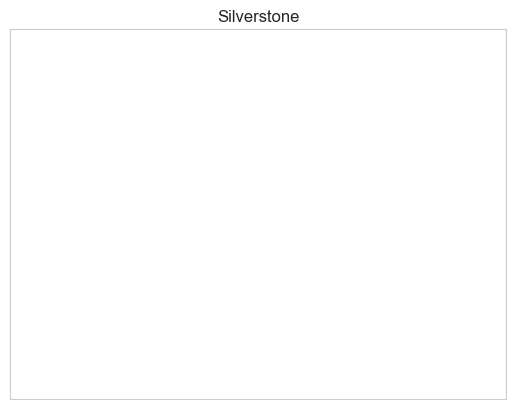

In [7]:
plt.title(session.event['Location'])
plt.xticks([])
plt.yticks([])
plt.axis('equal')
plt.show()

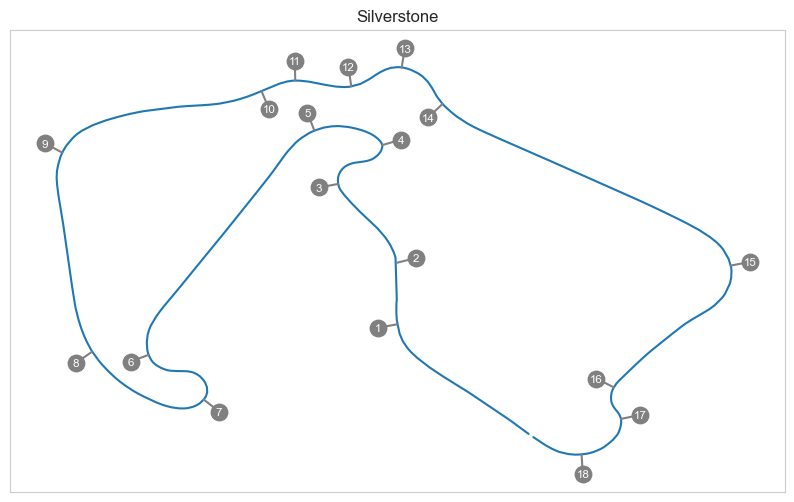

In [12]:
# ploteo todas las celdas juntas para que se superpongan
'''Como ya estan guardadas las variables importantes, solo pongo los plots'''
plt.figure(figsize=(10, 6))
plt.plot(rotated_track[:, 0], rotated_track[:, 1])
plt.scatter(text_x_arr, text_y_arr, color='grey', s=140)
for i, t in enumerate(txt_arr):
    plt.plot([track_x_arr[i], text_x_arr[i]], [track_y_arr[i], text_y_arr[i]], color='grey')
    plt.text(text_x_arr[i], text_y_arr[i], t, va='center_baseline', ha='center', size='small', color='white')
    
plt.title(session.event['Location'])
plt.grid(True)
plt.xticks([])
plt.yticks([])
plt.axis('equal')
plt.show()